# **LAB 02: XỬ LÝ VÀ TRỰC QUAN HOÁ DỮ LIỆU CHUỖI THỜI GIAN**

## **Import thư viện và dataset**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from math import pi
import plotly.graph_objs as go

In [78]:
df = pd.read_csv('Road Accident Data.csv')

## **1. Thu thập dữ liệu**

### **1.1. Câu chuyện bối cảnh khiến nhóm chọn chủ đề này ?**

- Hiện nay, tình trạng tai nạn giao thông ngày càng gia tăng, trở thành một vấn đề nhức nhối ảnh hưởng nghiêm trọng đến đời sống người dân, xã hội và sự phát triển kinh tế. Số lượng các vụ tai nạn giao thông không chỉ gia tăng về mặt số lượng mà còn trở nên phức tạp hơn, với mức độ nghiêm trọng ngày càng cao. Với vai trò là sinh viên trong lĩnh vực khoa học dữ liệu, em muốn phân tích và nhận diện các vấn đề và tìm kiếm các giải pháp đóng góp vào việc giảm thiểu tai nạn giao thông. 
- Tai nạn giao thông là một vấn đề không thể xem nhẹ, liên quan đến an toàn của hàng triệu người, việc phân tích dữ liệu tai nạn giao thông sẽ giúp nhận diện các yếu tố gây nguy hiểm, từ đó có thể hỗ trợ chính quyền và cơ quan chức năng đưa ra các chính sách cải thiện an toàn giao thông.
- Tai nạn giao thông có tính chất thay đổi theo thời gian: sáng - chiều, ngày trong tuần, các thời điểm đặc biệt như lễ, tết. Phân tích theo **chuỗi thời gian** là một phương pháp hiệu quả để hiểu rõ hơn về xu hướng, tính mùa vụ và những điểm bất thường trong các vụ tai nạn.
- Khi phân tích dữ liệu giúp hiểu được các nhân tố gây nên tai nạn và giúp việc dự báo được thời điểm hoặc khu vực có nguy cơ cao giúp tăng cường công tác phòng chống tai nạn. 


### **1.2. Chủ đề chính của bộ dữ liệu và nguồn gốc xây dựng bộ dữ liệu?**

- Bộ dữ liệu tập trung vào tai nạn giao thông ở Kensington and Chelsea.
- Dữ liệu này được lấy từ Kaggle: [https://www.kaggle.com/datasets/nextmillionaire/car-accident-dataset](https://www.kaggle.com/datasets/nextmillionaire/car-accident-dataset). Chứa các thông tin bao gồm các thông tin chi tiết liên quan đến như là thời gian xảy ra tai nạn, địa điểm, loại phương tiện, nguyên nhân,.. 

### **1.3. Việc thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?**

- Dữ liệu thu thập như nào : được thu thập từ trang web [data.gov.uk](https://www.data.gov.uk). Đây là một cổng thông tin dữ liệu mở của chính phủ Vương quốc Anh, cung cấp quyền truy cập vào nhiều bộ dữ liệu khác nhau do các cơ quan chính phủ và tổ chức công cộng thu thập.
- Phương pháp thu thập dữ liệu: dữ liệu do các cơ quan chính phủ và tổ chức công cộng thu thập và công bố theo các quy trình và tiêu chuẩn nhất định . Dữ liệu có thể được thu thập thông qua các phương pháp khác nhau, bao gồm: báo cáo của cảnh sát, hệ thống quản lý giao thông, báo cáo từ bệnh viện, khảo sát và nghiên cứu,..Những phương pháp này đảm bảo dữ liệu được thu thập một cách đáng tin cậy và nhất quán, phục vụ mục đích nghiên cứu và phân tích.

### **1.4. Chúng ta sử dụng tập dữ liệu này như thế nào? Điều này có hợp pháp để sử dụng trong giáo dục?**

- Sử dụng tập dữ liệu:
    - Tập dữ liệu này có thể được sử dụng để phân tích và nghiên cứu các xu hướng, chu kỳ và mùa vụ của tai nạn giao thông.
    - Dữ liệu có thể được sử dụng để trực quan hoá và phân tích các yếu tố ảnh hưởng đến tai nạn như là loại xe, thời gian trong ngày, tuần, ánh sáng, thời tiết,.... và đề xuất các biện pháp cải thiện an toàn giao thông.
- Hợp pháp để sử dụng trong giáo dục:
    - Tập dữ liệu này được cấp phép theo giấy phép [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0), một giấy phép mã nguồn mở phổ biến, cho phép sử dụng, sao chép, sửa đổi, và phân phối dữ liệu, miễn là tuân thủ các điều khoản của giấy phép. Điều này có nghĩa là bạn có thể sử dụng tập dữ liệu này cho mục đích giáo dục, bao gồm giảng dạy, nghiên cứu, và phát triển các dự án học thuật, mà không vi phạm bản quyền.
    - Do đó dữ liệu này hoàn toàn hợp pháp để sử dụng trong giáo dục.

## **2. Khám phá dữ liệu**

### **2.1 Giải thích ý nghĩa của từng dòng dữ liệu**

Mỗi dòng trong dataset đại diện cho một vụ tai nạn giao thông xảy ra vào một thời điểm và địa điểm cụ thể. Các dòng này chứa thông tin chi tiết về vụ tai nạn, chẳng hạn như mức độ nghiêm trọng, điều kiện thời tiết, số lượng phương tiện tham gia, số nạn nhân, và các thông tin khác liên quan đến vụ tai nạn.

Nếu có những dòng không có cùng ý nghĩa với các dòng khác trong dataset là một vấn đề quan trọng và có thể ảnh hưởng đến kết quả phân tích dữ liệu. Nếu có dòng không liên quan đến vụ tai nạn giao thông, chẳng hạn như dữ liệu bị thiếu hoặc lỗi, hoặc dữ liệu nằm khác cột, hoặc,... điều này có thể gây ra các vấn đề sau:

  1. **Dữ liệu không đồng nhất**: Nếu một số dòng không liên quan đến các vụ tai nạn giao thông, chẳng hạn như dữ liệu về các sự kiện khác, thì những dòng này sẽ làm loãng dữ liệu và ảnh hưởng đến tính chính xác của phân tích. Các dòng này có thể dẫn đến các kết luận sai lầm hoặc không đáng tin cậy.

  2. **Sai sót trong quá trình phân tích**: Nếu các dữ liệu bị trộn lẫn hoặc nằm khác cột, có thể gây khó khăn trong việc xác định và xử lý các trường hợp bất thường. Ví dụ, thông tin về địa điểm tai nạn có thể bị sai lệch, gây hiểu lầm về vị trí xảy ra sự cố, hoặc thông tin về mức độ nghiêm trọng của vụ tai nạn có thể bị nhầm với các cột khác.

  3. **Ảnh hưởng đến mô hình dự báo**: Trong các bài toán học máy hoặc mô hình dự báo, dữ liệu không đồng nhất sẽ làm giảm độ chính xác của mô hình, vì mô hình sẽ học từ các mẫu không đầy đủ hoặc không đúng.

In [79]:
df.head()

Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight     Kensington and Chelsea                 NaN  ...   
2               Daylight     Kensington and Chelsea                 NaN  ...   
3               Daylight     Kensington and Chelsea                 NaN  ...   
4  Darkness - lights lit     Kensington and Chelsea                 NaN  ...   

   Number_of_Casualties  Number_of_Vehicles         Police_Force  \
0                     1                   2  Metropolitan Police   
1                    11                   2  Metropolitan Police   
2                     1                   2  Metropolitan Police   
3                     1                   2  Metropolitan Police   
4                     1                   2  Metropolitan Police   

  Road_Surface_Conditions           Road_Type Speed_limit   Time  \
0                     Dry      One way street          30  15:11   
1             Wet or damp  Single carriageway          30  10:59   
2                     Dry  Single carriageway          30  14:19   
3            Frost or ice  Single carriageway          30   8:10   
4                     Dry  Single carriageway          30  17:25   

  Urban_or_Rural_Area  Weather_Conditions           Vehicle_Type  
0               Urban  Fine no high winds                    Car  
1               Urban  Fine no high winds  Taxi/Private hire car  
2               Urban  Fine no high winds  Taxi/Private hire car  
3               Urban               Other  Motorcycle over 500cc  
4               Urban  Fine no high winds                    Car  

[5 rows x 21 columns]

### **2.2 Ý nghĩa của từng cột**

Tập dữ liệu gồm 21 cột:

| **Cột**                        | **Mô tả**                                                                 |
|-----------------------------------|---------------------------------------------------------------------------------|
| **Accident_Index**                | Mã số duy nhất của mỗi vụ tai nạn.                                               |
| **Accident Date**                 | Ngày xảy ra tai nạn.                                                              |
| **Day_of_Week**                   | Ngày trong tuần mà tai nạn xảy ra (ví dụ: Monday, Tuesday, v.v.).                |
| **Junction_Control**              | Loại điều khiển giao thông tại các giao lộ (ví dụ: đèn giao thông, biển báo dừng). |
| **Junction_Detail**               | Chi tiết về giao lộ (ví dụ: giao lộ có vòng xuyến, giao lộ có tín hiệu đèn).   |
| **Accident_Severity**             | Mức độ nghiêm trọng của vụ tai nạn (ví dụ: nhẹ, trung bình, nghiêm trọng).      |
| **Latitude**                      | Vĩ độ của vị trí tai nạn.                                                        |
| **Light_Conditions**              | Điều kiện ánh sáng tại thời điểm tai nạn (ví dụ: ban ngày, ban đêm, có đèn chiếu sáng). |
| **Local_Authority_(District)**    | Cơ quan chức năng quản lý khu vực tai nạn (ví dụ: quận, huyện).                |
| **Carriageway_Hazards**          | Các mối nguy hiểm trên mặt đường (ví dụ: vật cản, chướng ngại vật).             |
| **Longitude**                     | Kinh độ của vị trí tai nạn.                                                      |
| **Number_of_Casualties**         | Số nạn nhân trong vụ tai nạn.                                                    |
| **Number_of_Vehicles**           | Số lượng phương tiện tham gia vụ tai nạn.                                        |
| **Police_Force**                  | Lực lượng cảnh sát tham gia điều tra vụ tai nạn.                                 |
| **Road_Surface_Conditions**      | Điều kiện bề mặt đường (ví dụ: khô ráo, ướt, trơn trượt).                       |
| **Road_Type**                     | Loại đường (ví dụ: quốc lộ, đường nông thôn, đường đô thị).                      |
| **Speed_limit**                   | Giới hạn tốc độ cho phép tại khu vực xảy ra tai nạn.                              |
| **Time**                          | Thời gian xảy ra tai nạn.                                                        |
| **Urban_or_Rural_Area**           | Khu vực xảy ra tai nạn là khu vực đô thị hay nông thôn.                          |
| **Weather_Conditions**            | Điều kiện thời tiết tại thời điểm tai nạn (ví dụ: mưa, nắng, sương mù).        |
| **Vehicle_Type**                  | Loại phương tiện tham gia tai nạn (ví dụ: ô tô, xe máy, xe tải).                |


### **2.3 Xác định kiểu dữ liệu của từng cột và kiểm tra xem loại dữ liệu có phù hợp để xử lý tiếp theo hay không.**

In [80]:
df.dtypes

Accident_Index                 object
Accident Date                  object
Day_of_Week                    object
Junction_Control               object
Junction_Detail                object
Accident_Severity              object
Latitude                      float64
Light_Conditions               object
Local_Authority_(District)     object
Carriageway_Hazards            object
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                   object
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                     int64
Time                           object
Urban_or_Rural_Area            object
Weather_Conditions             object
Vehicle_Type                   object
dtype: object

Có thể thấy cột `Accident Date` và cột `Time` có kiểu là object. Điều này là không phù hợp. Cột `Accident Date` chỉ ngày tháng năm nên sẽ đổi về kiểu `datetime64[ns]` và cột `Time` chỉ thời gian xảy ra tai nạn, nhưng để gom nhóm tốt hơn, ta chỉ lấy giờ (mà không lấy phút) nên sẽ chuyển thành kiểu `float`

In [81]:
# Convert 'Accident_Date' to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'], format='%m/%d/%Y')

# Extract  only the daily hour of each accident
df['Time']= df['Time'].str.split(':').str[0]

# Convert 'Time' column to float
df['Time'] = df['Time'].astype(float)

In [82]:
df.dtypes

Accident_Index                        object
Accident Date                 datetime64[ns]
Day_of_Week                           object
Junction_Control                      object
Junction_Detail                       object
Accident_Severity                     object
Latitude                             float64
Light_Conditions                      object
Local_Authority_(District)            object
Carriageway_Hazards                   object
Longitude                            float64
Number_of_Casualties                   int64
Number_of_Vehicles                     int64
Police_Force                          object
Road_Surface_Conditions               object
Road_Type                             object
Speed_limit                            int64
Time                                 float64
Urban_or_Rural_Area                   object
Weather_Conditions                    object
Vehicle_Type                          object
dtype: object

### **2. 4 Đối với mỗi cột có kiểu dữ liệu số, các giá trị được phân bổ như thế nào?**

Tỷ lệ giá trị bị thiếu (0% - 100%) của các cột có kiểu dữ liệu số là

In [83]:
# Lấy ra các cột có kiểu dữ liệu số (int, float)
numeric_cols = df.select_dtypes(include='number').columns
missing_ratio = df[numeric_cols].isnull().mean() * 100  # phần trăm dữ liệu thiếu
print(missing_ratio)

Latitude                0.00000
Longitude               0.00000
Number_of_Casualties    0.00000
Number_of_Vehicles      0.00000
Speed_limit             0.00000
Time                    0.00552
dtype: float64


Các chỉ số thống kê khác của các cột có kiểu dữ liệu số

In [84]:
df.describe()

Accident Date       Latitude      Longitude  \
count                         307973  307973.000000  307973.000000   
mean   2021-12-23 22:19:39.804722944      52.487005      -1.368884   
min              2021-01-01 00:00:00      49.914488      -7.516225   
25%              2021-06-28 00:00:00      51.485248      -2.247937   
50%              2021-12-08 00:00:00      52.225943      -1.349258   
75%              2022-06-25 00:00:00      53.415517      -0.206810   
max              2022-12-31 00:00:00      60.598055       1.759398   
std                              NaN       1.339011       1.356092   

       Number_of_Casualties  Number_of_Vehicles    Speed_limit           Time  
count         307973.000000       307973.000000  307973.000000  307956.000000  
mean               1.356882            1.829063      38.866037      13.561723  
min                1.000000            1.000000      10.000000       0.000000  
25%                1.000000            1.000000      30.000000      10.000000  
50%                1.000000            2.000000      30.000000      14.000000  
75%                1.000000            2.000000      50.000000      17.000000  
max               48.000000           32.000000      70.000000      23.000000  
std                0.815857            0.710477      14.032933       5.132652

Quan sát thấy cột `Time` có dữ liệu bị thiếu. Tiến hành lấp đầy bằng giá trị trung bình. Nếu ta giả định rằng thời gian xảy ra các vụ tai nạn có sự phân bố khá đồng đều hoặc gần như không có sự chênh lệch quá lớn, thì việc lấp đầy các giá trị thiếu bằng giá trị trung bình có thể phản ánh hợp lý một khoảng thời gian chung cho tất cả các vụ tai nạn trong dataset.

In [85]:
# Calculate the mean of the 'Time' column
mean_time = df['Time'].mean().round(0)

# Fill missing values in the 'Time' column with the calculated mean
df['Time'] = df['Time'].fillna(mean_time)

In [86]:
df.describe()

Accident Date       Latitude      Longitude  \
count                         307973  307973.000000  307973.000000   
mean   2021-12-23 22:19:39.804722944      52.487005      -1.368884   
min              2021-01-01 00:00:00      49.914488      -7.516225   
25%              2021-06-28 00:00:00      51.485248      -2.247937   
50%              2021-12-08 00:00:00      52.225943      -1.349258   
75%              2022-06-25 00:00:00      53.415517      -0.206810   
max              2022-12-31 00:00:00      60.598055       1.759398   
std                              NaN       1.339011       1.356092   

       Number_of_Casualties  Number_of_Vehicles    Speed_limit           Time  
count         307973.000000       307973.000000  307973.000000  307973.000000  
mean               1.356882            1.829063      38.866037      13.561747  
min                1.000000            1.000000      10.000000       0.000000  
25%                1.000000            1.000000      30.000000      10.000000  
50%                1.000000            2.000000      30.000000      14.000000  
75%                1.000000            2.000000      50.000000      17.000000  
max               48.000000           32.000000      70.000000      23.000000  
std                0.815857            0.710477      14.032933       5.132511

Đối với các cột có kiểu dữ liệu không phải số, bạn tính toán:

- Tỷ lệ phần trăm (từ 0 đến 100) các giá trị bị thiếu (missing_ratio)
- Số lượng giá trị (các giá trị ở đây là các giá trị khác nhau và không xem xét các giá trị bị thiếu) (num_values)
- Tỷ lệ phần trăm (từ 0 đến 100) của mỗi giá trị được sắp xếp theo tỷ lệ phần trăm giảm dần (không xem xét giá trị còn thiếu, tỷ lệ là tỷ lệ so với số giá trị không thiếu) (value_ratios)

In [87]:
# YOUR CODE HERE
# raise NotImplementedError()

# YOUR CODE HERE
# raise NotImplementedError()

# Lấy các cột không phải dạng số (non-numeric) (ví dụ: category, object)
non_numeric_cols = df.select_dtypes(include='object')

# Khởi tạo một dictionary rỗng để lưu thông tin
table = {}
for col in non_numeric_cols.columns:
    # Tính tỷ lệ giá trị bị thiếu (missing value) trong cột, dưới dạng phần trăm
    missing_ratio = non_numeric_cols[col].isna().mean() * 100

    # Tính tỷ lệ xuất hiện của từng giá trị (giá trị unique) trong cột, dưới dạng phần trăm và làm tròn đến 1 chữ số thập phân
    value_ratios = (non_numeric_cols[col].value_counts(normalize=True) * 100).round(1)

    # Sắp xếp các giá trị unique theo thứ tự giảm dần và chuyển kết quả thành một dictionary
    value_ratios = value_ratios.sort_values(ascending=False).to_dict()  # Sắp xếp giảm dần và chuyển thành dict

    # Lấy số lượng giá trị duy nhất (unique values) trong cột
    num_values = non_numeric_cols[col].nunique()

    table[col] = {
        'missing_ratio' : missing_ratio,
        'num_values' : num_values,
        'value_ratios' : value_ratios
    }
# Chuyển đổi dictionary `table` thành DataFrame
cat_col_info_df = pd.DataFrame(table)


# Đổi tên các hàng của DataFrame kết quả
cat_col_info_df.index = ["missing_ratio", "num_values", "value_ratios"]
# cat_col_info_df
for col in cat_col_info_df.columns:
    print(f"Column: {col}")
    print("Missing ratios: ", cat_col_info_df.loc['missing_ratio', col])
    print("Number values: ", cat_col_info_df.loc['num_values', col])
    print("Value Ratios:")
    print(cat_col_info_df.loc['value_ratios', col])
    print("\n")


Column: Accident_Index
Missing ratios:  0.0
Number values:  197644
Value Ratios:
{'2.01E+12': 35.8, '200901BS70197': 0.0, '200901BS70051': 0.0, '200901BS70052': 0.0, '200901BS70053': 0.0, '200901BS70054': 0.0, '200901BS70055': 0.0, '200901BS70031': 0.0, '200901BS70028': 0.0, '200901BS70057': 0.0, '200901BS70012': 0.0, '200901BS70003': 0.0, '200901BS70004': 0.0, '200901BS70005': 0.0, '200901BS70006': 0.0, '200901BS70007': 0.0, '200901BS70008': 0.0, '200901BS70009': 0.0, '200901BS70010': 0.0, '200901BS70011': 0.0, '200901BS70015': 0.0, '200901BS70027': 0.0, '200901BS70016': 0.0, '200901BS70050': 0.0, '200901BS70049': 0.0, '200901BS70047': 0.0, '200901BS70032': 0.0, '200901BS70199': 0.0, '200901BS70200': 0.0, '200901BS70201': 0.0, '200901BS70202': 0.0, '200901BS70203': 0.0, '200901BS70124': 0.0, '200901BS70123': 0.0, '200901BS70122': 0.0, '200901BS70043': 0.0, '200901BS70033': 0.0, '200901BS70045': 0.0, '200901BS70035': 0.0, '200901BS70036': 0.0, '200901BS70037': 0.0, '200901BS70039': 0.0

- Cột `Carriageway_Hazards` có dữ liệu bị thiếu hơn 98% nên sẽ bị loại bỏ
- Để tạo sự hợp lý và chặt chẽ giữa các cột trong dữ liệu, từ cột `Road_Surface_Conditions` ta sẽ điền giá trị còn thiếu hợp lý vào cột `Weather_Conditions` và điền giá trị `other` đối với các trường hợp còn lại
- Tương tự, thay thế các giá trị bị thiếu của cột `Road_Surface_Conditions` phụ thuộc vào cột `Weather_Conditions`
- Thay thế các giá trị thiếu còn lại của cột `Road_Surface_Conditions` và cột `Road_Type` bằng giá trị mode

Lý do có thể lấy đầy các giá trị thiếu bằng mode
- Cột `Road_Surface_Conditions` thường có các giá trị như `Dry`, `Wet`, `Snow`, `Flooded`,... trong đó `Dry` (Khô) có thể là điều kiện mặt đường phổ biến nhất trong một số khu vực.
- Cột `Road_Type` có thể có các giá trị như `Urban`, `Rural`,... trong đó `Urban` (Thành phố) thường là loại đường xuất hiện nhiều nhất ở nhiều khu vực.

Mode là giá trị phân loại xuất hiện nhiều nhất, và nếu không có thông tin đầy đủ về điều kiện hoặc loại đường, lấp đầy các giá trị thiếu bằng mode sẽ giúp duy trì tính nhất quán với phần lớn dữ liệu còn lại.

In [88]:
df['Weather_Conditions'].unique()

array(['Fine no high winds', 'Other', 'Raining no high winds',
       'Snowing no high winds', 'Fine + high winds',
       'Raining + high winds', nan, 'Snowing + high winds', 'Fog or mist'],
      dtype=object)

In [89]:
# Drop Unbalanced columns
df.drop(columns='Carriageway_Hazards', inplace=True)

# Fill in the missing values ​​depending on the weather conditions.
weather_conditions_mapping = {
    'Fine no high winds': 'Dry',
    'Raining no high winds': 'Wet or damp',
    'Snowing no high winds': 'Snow',
    'Fog or mist': 'Fog or mist',
    'Snowing + high winds': 'Frost or ice',
}
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Weather_Conditions'].map(weather_conditions_mapping))

# Fill in the remaining missing values ​​with the most common values
most_freq_surface_conditions = df['Road_Surface_Conditions'].mode()[0]
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(most_freq_surface_conditions)

most_freq_road_type = df['Road_Type'].mode()[0]
df['Road_Type'] = df['Road_Type'].fillna(most_freq_road_type)

In [90]:
df['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet or damp', 'Frost or ice', 'Snow',
       'Flood over 3cm. deep', 'Fog or mist'], dtype=object)

In [91]:
# Fill in the missing values ​​depending on the road conditions.
road_conditions_mapping = {
    'Dry': 'Fine no high winds',
    'Wet or damp': 'Raining no high winds',
    'Snow': 'Snowing no high winds',
    'Frost or ice': 'Snowing + high winds'
}

df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Road_Surface_Conditions'].map(road_conditions_mapping))
df['Weather_Conditions'] = df['Weather_Conditions'].fillna('Other')

### **2.5 Có cần phải xử lý trước dữ liệu không và nếu có thì bạn cần phải làm như thế nào?**

- Sửa lại các giá trị sai chính tả trong cột `Accident_Severity` (phải là `Fatal` thay vì `Fetal`)
- Cột `Vehicle_Type` có quá nhiều loại xe mà không quá khác nhau và cũng ít quan trọng nên thay thế giá trị để dễ phân tích hơn
- Từ cột `Accident Date`, tách riêng ra các cột `year`, `month`, `day` để dễ làm việc
- Loại bỏ các cột không cần thiết

In [92]:
# replace vales in Accident_Severity columns
df['Accident_Severity'] = df['Accident_Severity'].replace('Fetal', 'Fatal')

# drop unwanted columns
df.drop(columns=['Junction_Control','Local_Authority_(District)','Police_Force', 'Junction_Detail'], inplace=True)

In [93]:
category_mapping = {
    'Car': 'Car',
    'Taxi/Private hire car': 'Taxi',
    'Motorcycle over 500cc': 'Motorcycle',
    'Van / Goods 3.5 tonnes mgw or under': 'Van',
    'Goods over 3.5t. and under 7.5t': 'Other',
    'Motorcycle 125cc and under': 'Motorcycle',
    'Motorcycle 50cc and under': 'Motorcycle',
    'Bus or coach (17 or more pass seats)': 'Bus',
    'Goods 7.5 tonnes mgw and over': 'Other',
    'Other vehicle': 'Other',
    'Motorcycle over 125cc and up to 500cc': 'Motorcycle',
    'Agricultural vehicle': 'Other',
    'Minibus (8 - 16 passenger seats)': 'Other',
    'Pedal cycle': 'Pedal cycle',
    'Ridden horse': 'Ridden horse'
}

# Map values in 'Vehicle_Type' column to the specified categories
df['Vehicle_Type'] = df['Vehicle_Type'].map(category_mapping)

In [94]:
# Tạo cột "Year" và "Month" để phân tích xu hướng theo năm và tháng
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month
df['Day'] = df['Accident Date'].dt.day

## ***3.Khám phá các mối quan hệ trong dữ liệu***

### **3.1 Khám phá các mối quan hệ đơn thuộc tính**

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Accident_Index           307973 non-null  object        
 1   Accident Date            307973 non-null  datetime64[ns]
 2   Day_of_Week              307973 non-null  object        
 3   Accident_Severity        307973 non-null  object        
 4   Latitude                 307973 non-null  float64       
 5   Light_Conditions         307973 non-null  object        
 6   Longitude                307973 non-null  float64       
 7   Number_of_Casualties     307973 non-null  int64         
 8   Number_of_Vehicles       307973 non-null  int64         
 9   Road_Surface_Conditions  307973 non-null  object        
 10  Road_Type                307973 non-null  object        
 11  Speed_limit              307973 non-null  int64         
 12  Time            

In [96]:
# Set the visual style
sns.set(style="whitegrid")

# Function to create bar plots for categorical attributes
def plot_bar(column_name, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column_name, palette="viridis", order=df[column_name].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

def pie_chart(name, title):
    tmp = df[name].value_counts()
    total = tmp.sum()
    threshold = 0.05  
    small_categories = tmp[tmp / total < threshold]

    if not small_categories.empty:
        tmp.loc['Other'] = small_categories.sum()
        tmp = tmp.drop(small_categories.index)  

    plt.figure(figsize=(10, 6))
    plt.pie(tmp, labels=tmp.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

#### **`Cột Accident Severity`**

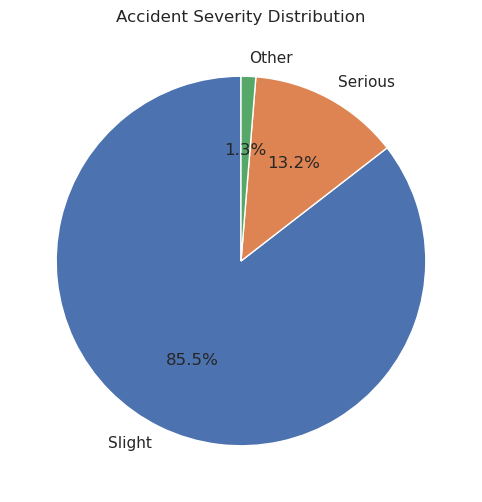

In [97]:
# Accident Severity
pie_chart('Accident_Severity', 'Accident Severity Distribution')

- Hầu hết các tai nạn là ở mức nhẹ, còn lại một vài tai nạn ở mức nghiêm trọng và tử vong.

#### **`Cột Day of the Week`**

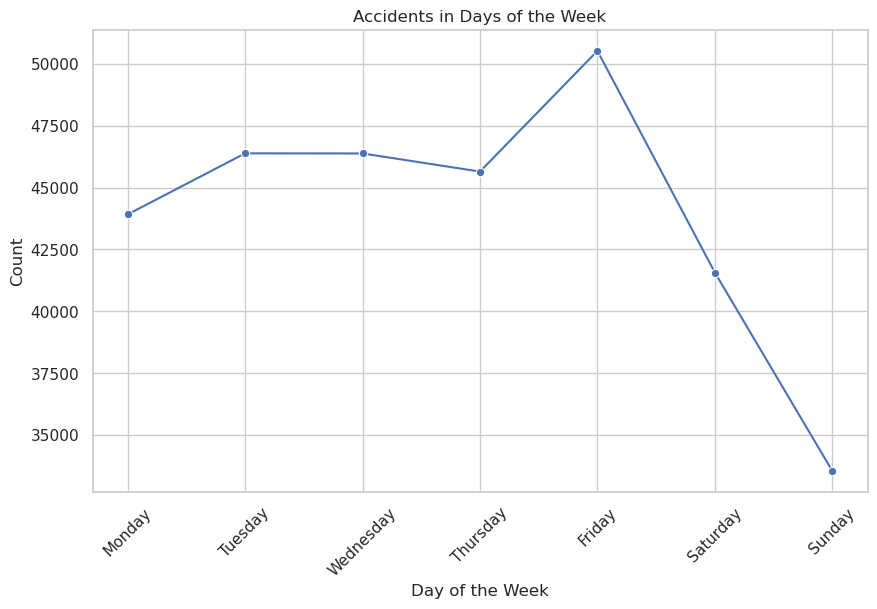

In [98]:
# Day of the Week
cmp = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Count occurrences of each day of the week
day_counts = df['Day_of_Week'].value_counts().reset_index()
day_counts.columns = ['Day_of_Week', 'Count']

# Map the days of the week to their values
day_counts['day_value'] = day_counts['Day_of_Week'].map(cmp)

# Sort the data frame based on the new column
day_counts = day_counts.sort_values(by='day_value')

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_counts['Day_of_Week'], y=day_counts['Count'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Accidents in Days of the Week')
plt.grid(True)
plt.show()

- Các tai nạn xảy ra chủ yếu là vào các ngày trong tuần, điều này có thể là do trong tuần thì lượng xe lưu thông trên đường lớn hơn do mọi người phải đi làm, cao điểm là vào thứ 6. Vào thứ 7 và chủ nhật thì lượng tai nạn có giảm nhẹ so với trong tuần.

#### **`Cột Number of casualties`**

/tmp/ipykernel_11957/2647083661.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




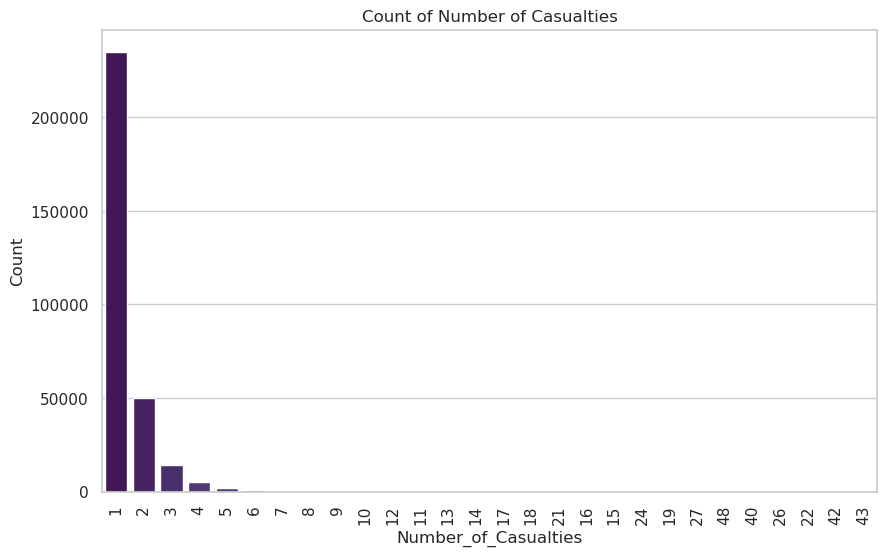

In [99]:
# Number of casualties
plot_bar("Number_of_Casualties", "Count of Number of Casualties", "Number_of_Casualties", "Count")

- Đa số các vụ tai nạn có số lượng người tử vong thấp, tuy nhiên vẫn có một số vụ có số lượng người tử vong rất lớn, lên đến 43 người.

#### **`Cột Speed limit`**

/tmp/ipykernel_11957/2647083661.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




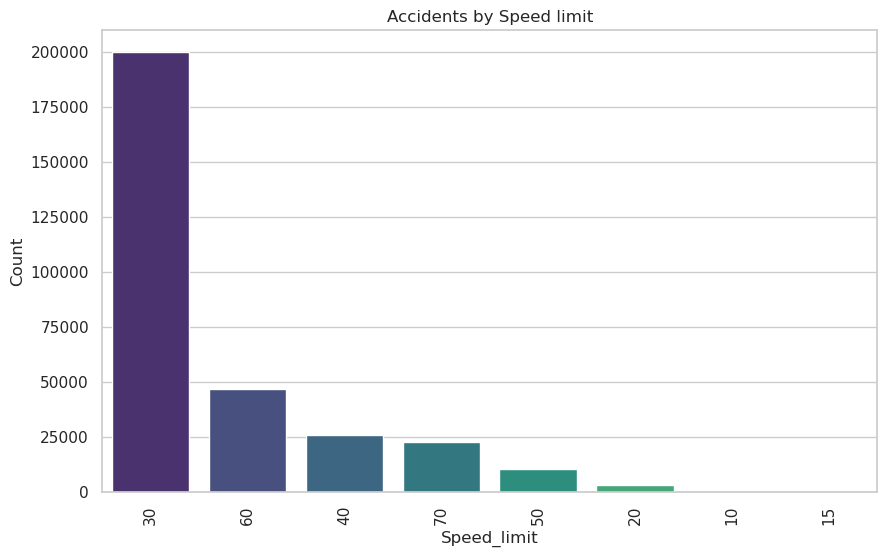

In [100]:
# Speed limit
plot_bar("Speed_limit", "Accidents by Speed limit", "Speed_limit", "Count")

- Lượng tai nạn tập trung chủ yếu ở các đoạn đường có giới hạn tốc độ là 30mph (~50km/h), điều này có thể là do hầu hết các đoạn đường này sẽ có lượng xe lưu thông lớn hơn hoặc có thể do hầu hết các đoạn đường sẽ có giới hạn là 30mph.

#### **`Cột Light Conditions`**

/tmp/ipykernel_11957/2647083661.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




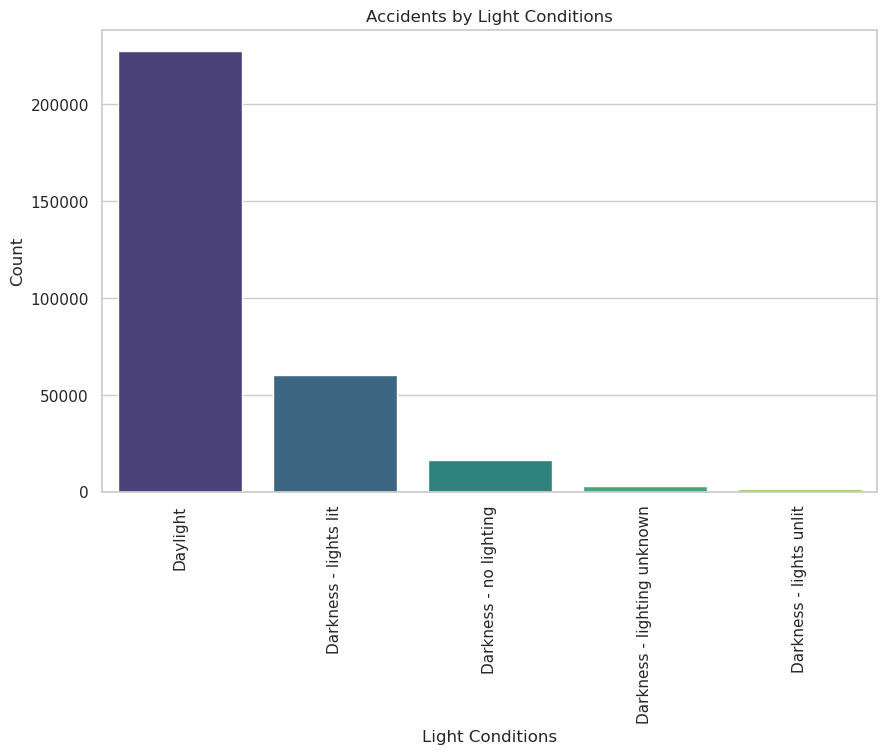

In [101]:
# Light Conditions
plot_bar("Light_Conditions", "Accidents by Light Conditions", "Light Conditions", "Count")

- Hầu hết các vụ tai nạn diễn ra vào ban ngày, điều này có thể là do lượng xe lưu thông vào ban ngày nhiều hơn so với những thời điểm khác trong ngày.

#### **`Cột Road Surface Conditions`**

/tmp/ipykernel_11957/2647083661.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




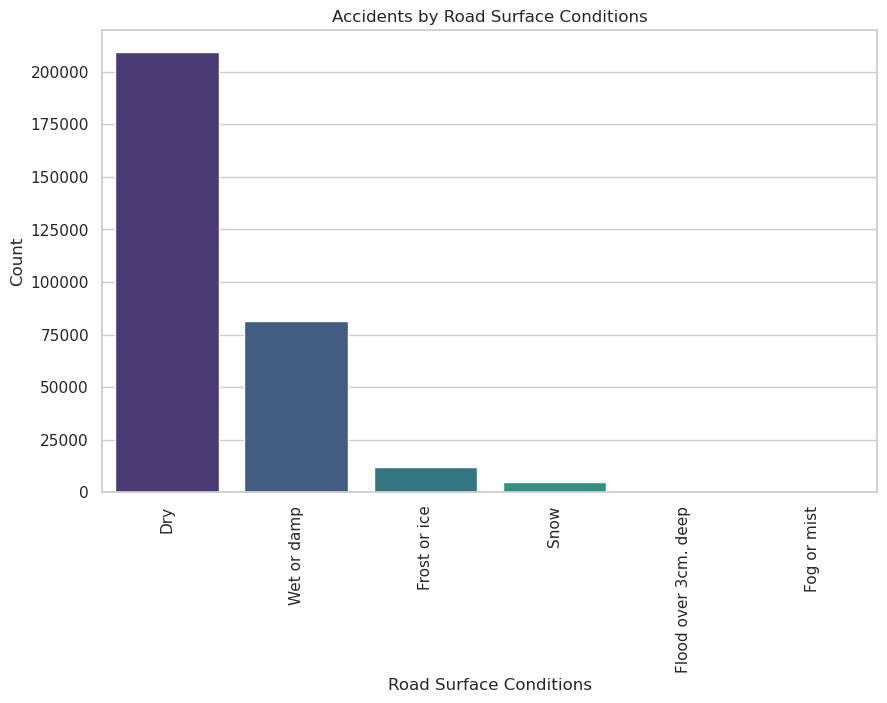

In [102]:
# Road Surface Conditions
plot_bar("Road_Surface_Conditions", "Accidents by Road Surface Conditions", "Road Surface Conditions", "Count")

- Biểu đồ cho thấy phần lớn tai nạn xảy ra trên mặt đường khô, tuy nhiên, các tình trạng như đường ướt, có tuyết hoặc băng cũng góp phần quan trọng vào số vụ tai nạn. Điều này cho thấy tầm quan trọng của việc lái xe cẩn thận trong điều kiện thời tiết xấu và duy trì cơ sở hạ tầng giao thông an toàn, đặc biệt trong các vùng có khí hậu lạnh hoặc mùa mưa.

#### **`Weather Conditions`**

/tmp/ipykernel_11957/2647083661.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




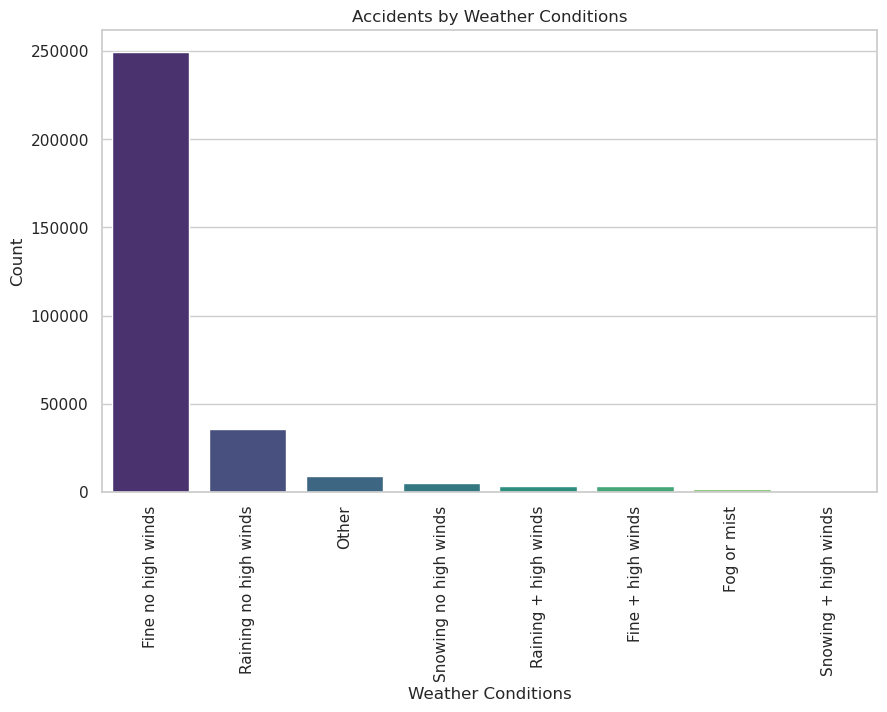

In [103]:
# Weather Conditions
plot_bar("Weather_Conditions", "Accidents by Weather Conditions", "Weather Conditions", "Count")

- Có thể thấy rằng tai nạn xảy ra chủ yếu trong điều kiện thời tiết tốt, không có gió mạnh. Tuy nhiên, mưa và gió mạnh có tác động rõ rệt đến sự an toàn giao thông, làm tăng nguy cơ tai nạn. 

#### **`Cột Vehicle Type`**

/tmp/ipykernel_11957/2647083661.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




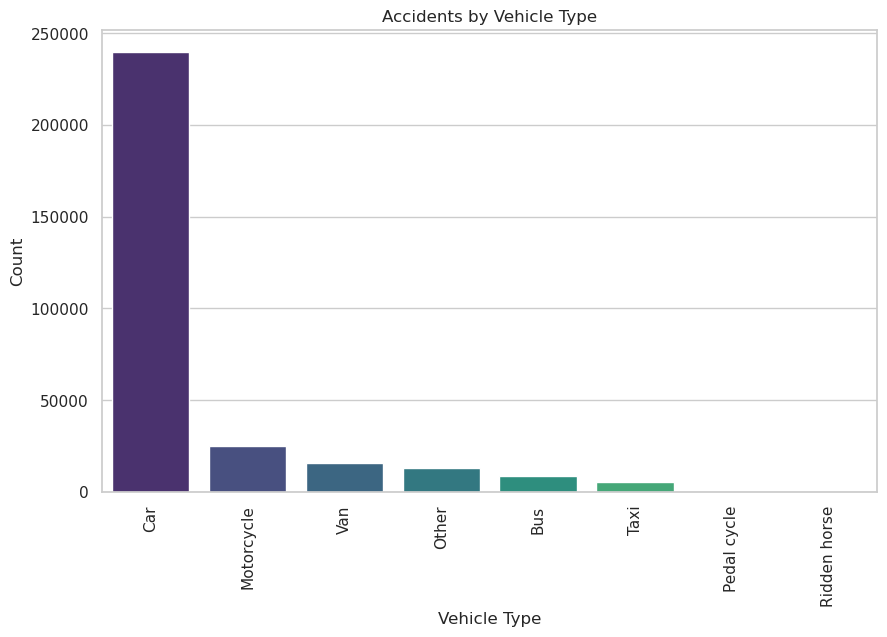

In [104]:
# Vehicle Type
plot_bar("Vehicle_Type", "Accidents by Vehicle Type", "Vehicle Type", "Count")

- Hầu hết các vụ tai nạn là bởi xe ô tô, điều này có thể là do xe ô tô là loại xe phổ biến ở London (là khu vực được lấy dữ liệu)

#### **`Cột Urban or rural`**

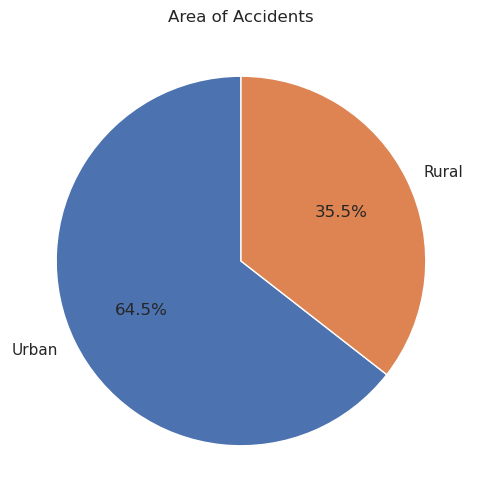

In [105]:
# Urban or rural
pie_chart('Urban_or_Rural_Area', 'Area of Accidents')

- Số lượng tai nạn ở khu vực thành phố nhiều gấp đôi so với nông thôn. Điều này cũng dễ hiểu vì ở thành phố thường sẽ có lượng xe lưu thông lớn hơn.

#### **`Cột Road type`**

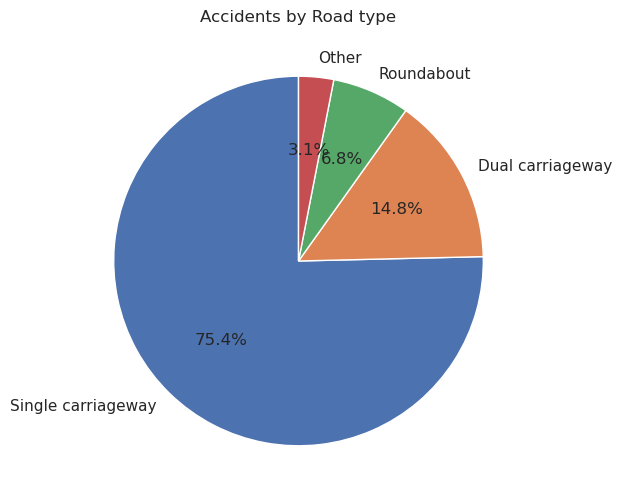

In [106]:
# Road type
pie_chart('Road_Type', 'Accidents by Road type')

- 3/4 số tai nạn là diễn ra ở đường 1 chiều, điều này có thể là do lưu lượng giao thông lớn trên các tuyến đường một chiều có thể tạo ra áp lực giao thông dày đặc, khiến các xe phải di chuyển gần nhau hơn và dễ gây ra va chạm. Còn lại là tập trung ở đường 2 chiều và ở các bùng binh.

### **3.2 Phân tích biểu đồ các cột đôi**

#### **3.2.1 Có sự khác biệt nào về xu hướng và chu kỳ của số lượng tai nạn trong các khu vực đô thị và nông thôn không?**

In [107]:
# Tách dữ liệu thành hai nhóm: Đô thị và Nông thôn
urban_accidents = df[df['Urban_or_Rural_Area'] == 'Urban']
rural_accidents = df[df['Urban_or_Rural_Area'] == 'Rural']

# Nhóm số tai nạn theo thời gian (tháng) cho từng nhóm
urban_accidents_by_month = (
    urban_accidents.groupby(['Year', 'Month'])
    .size()
    .reset_index(name='Accidents')
)
rural_accidents_by_month = (
    rural_accidents.groupby(['Year', 'Month'])
    .size()
    .reset_index(name='Accidents')
)

# Thêm cột "Date" cho chuỗi thời gian
urban_accidents_by_month['Date'] = pd.to_datetime(
    urban_accidents_by_month['Year'].astype(str) + '-' + urban_accidents_by_month['Month'].astype(str),
    format='%Y-%m'
)
rural_accidents_by_month['Date'] = pd.to_datetime(
    rural_accidents_by_month['Year'].astype(str) + '-' + rural_accidents_by_month['Month'].astype(str),
    format='%Y-%m'
)

# Đặt cột Date làm chỉ số để phục vụ phân tích chuỗi thời gian
urban_accidents_by_month.set_index('Date', inplace=True)
rural_accidents_by_month.set_index('Date', inplace=True)


<Figure size 1200x800 with 0 Axes>

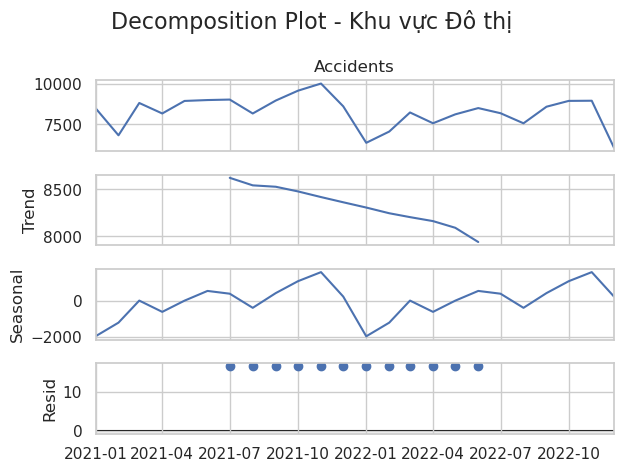

<Figure size 1200x800 with 0 Axes>

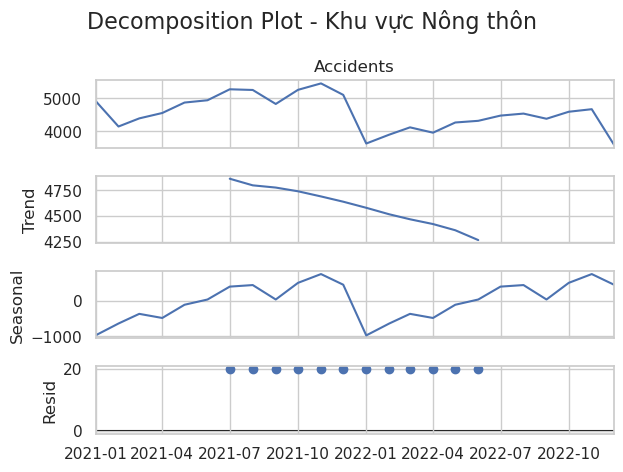

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Phân tích decomposition cho khu vực đô thị
urban_decompose = seasonal_decompose(urban_accidents_by_month['Accidents'], model='additive', period=12)
rural_decompose = seasonal_decompose(rural_accidents_by_month['Accidents'], model='additive', period=12)

# Vẽ decomposition plot cho khu vực đô thị
plt.figure(figsize=(12, 8))
urban_decompose.plot()
plt.suptitle('Decomposition Plot - Khu vực Đô thị', fontsize=16)
plt.tight_layout()
plt.show()

# Vẽ decomposition plot cho khu vực nông thôn
plt.figure(figsize=(12, 8))
rural_decompose.plot()
plt.suptitle('Decomposition Plot - Khu vực Nông thôn', fontsize=16)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

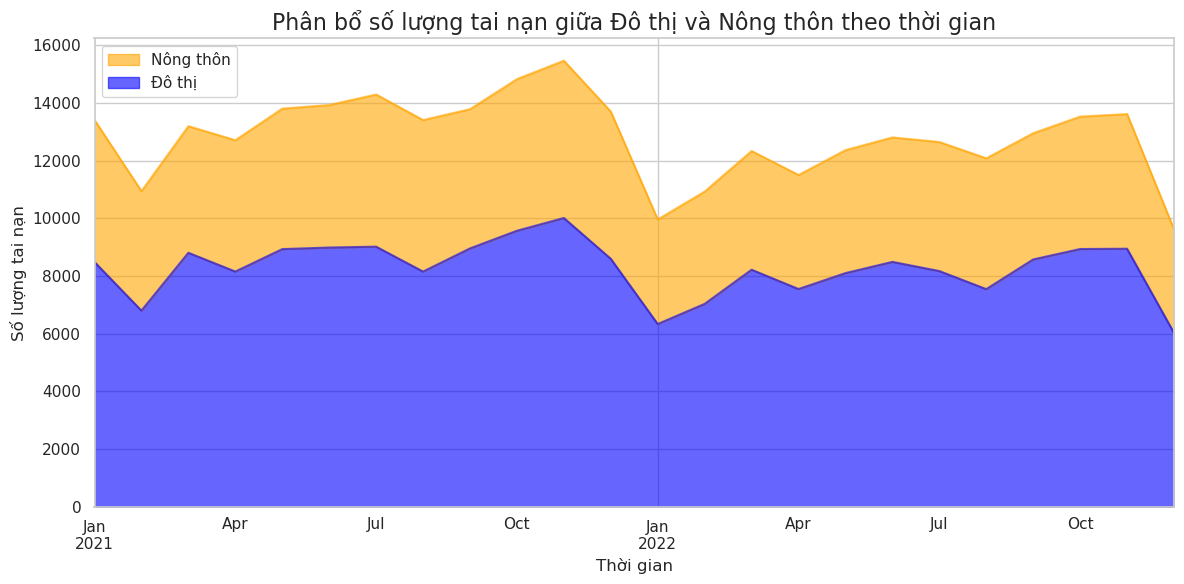

In [109]:
# Tổng hợp dữ liệu để vẽ Stacked Area Chart
combined_accidents = pd.DataFrame({
    'Date': urban_accidents_by_month.index,
    'Urban': urban_accidents_by_month['Accidents'],
    'Rural': rural_accidents_by_month['Accidents']
}).set_index('Date')

# Vẽ biểu đồ Stacked Area Chart
plt.figure(figsize=(12, 6))
# Vẽ biểu đồ với màu sắc rõ ràng
combined_accidents.plot.area(stacked=True, alpha=0.6, figsize=(12, 6), color=['blue', 'orange'])

# Thêm tiêu đề, trục và định dạng
plt.title('Phân bổ số lượng tai nạn giữa Đô thị và Nông thôn theo thời gian', fontsize=16)
plt.xlabel('Thời gian')
plt.ylabel('Số lượng tai nạn')

# Thêm chú thích đúng màu và đúng ngôn ngữ
handles = [
    plt.Rectangle((0, 0), 1, 1, color='orange', alpha=0.6),  # Vùng nông thôn
    plt.Rectangle((0, 0), 1, 1, color='blue', alpha=0.6)    # Vùng đô thị
]
plt.legend(handles, ['Nông thôn', 'Đô thị'], loc='upper left')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()




####  **Biểu đồ: Tổng số tai nạn giao thông giữa khu vực đô thị và nông thôn theo thời gian**
Các biểu đồ này giúp so sánh tỷ trọng và xu hướng của số lượng tai nạn giữa hai khu vực, từ đó hiểu rõ hơn sự khác biệt về đặc điểm giao thông ở các vùng khác nhau. Ngoài ra còn giúp phân tích, nhận diện quy luật dài hạn hoặc theo mùa của số tai nạn giao thông ở thành thị và nông thôn

#### Loại biểu đồ sử dụng:
1. Biểu đồ vùng xếp chồng(Stacked Area Chart):
  - Thể hiện tổng số tai nạn giao thông qua từng tháng (trục thời gian).
  - Hiển thị tỷ trọng của tai nạn xảy ra tại đô thị và nông thôn trong tổng số tai nạn.
  - Màu sắc được xếp chồng giúp dễ dàng so sánh mức độ đóng góp của từng khu vực vào tổng số tai nạn.
  - Lý do chọn biểu đồ này:
    - Dễ dàng so sánh tỷ trọng giữa hai khu vực trong cùng một khung thời gian.
    - Hiển thị xu hướng tổng số tai nạn theo thời gian, đồng thời nhấn mạnh sự khác biệt về tỷ trọng giữa đô thị và nông thôn.
    - Tính trực quan cao, dễ nhận diện vùng chiếm ưu thế (đô thị chiếm phần lớn).
2. Biểu đồ phân tích thành phần (Decomposition Plot)
Biểu đồ này thể hiện:
  - Xu hướng (Trend): Xu hướng dài hạn của số tai nạn.
  - Mùa vụ (Seasonality): Tính chu kỳ lặp lại theo tháng.
  - Nhiễu (Residuals): Phần biến động không thể giải thích được bởi xu hướng và mùa vụ.
  - Lý do chọn biểu đồ này:
    - Giúp tách biệt rõ ràng các thành phần trong chuỗi thời gian: xu hướng, mùa vụ, và nhiễu.
    - Là công cụ đặc thù để phân tích dữ liệu chuỗi thời gian, cung cấp thông tin chi tiết mà biểu đồ đường hoặc cột không thể hiện được.

3. Lý do không sử dụng các biểu đồ khác (nêu một số ví dụ điển hình)
  - Biểu đồ cột: Không thể hiện tính liên tục của dữ liệu chuỗi thời gian và khó nhận ra xu hướng dài hạn. Không thể tách riêng các yếu tố tác động đến số lượng tai nạn, dẫn đến khó xác định quy luật cụ thể (như chu kỳ hoặc nhiễu).
  - Biểu đồ đường: Dễ bị rối nếu sử dụng hai đường riêng biệt cho đô thị và nông thôn, không cho thấy rõ sự so sánh tỷ trọng giữa hai khu vực.
  - Biểu đồ pie chart hoặc stacked chart: Chỉ thể hiện tỷ lệ hoặc phân bố, không cung cấp thông tin về xu hướng hoặc yếu tố mùa vụ.

##### **Phân tích**
- Khu vực đô thị luôn chiếm tỷ trọng lớn hơn (khoảng 70%-80%) so với khu vực nông thôn (20%-30%).
- Điều này do mật độ giao thông tại đô thị cao hơn, với nhiều phương tiện và lưu lượng lớn.
* Đô thị
  - Xu hướng (Trend):
      - Số tai nạn tại đô thị giảm dần từ đầu năm 2021 (~9,000 tai nạn/tháng) xuống còn ~8,000 tai nạn/tháng vào cuối năm 2022.
      - Điều này cho thấy một xu hướng giảm dài hạn, có thể nhờ các biện pháp cải thiện giao thông đô thị hoặc giảm lưu lượng phương tiện.
  - Mùa vụ (Seasonality):
    - Tai nạn giao thông tại đô thị có tính chu kỳ rõ rệt, với số tai nạn tăng cao vào tháng 6-8 (mùa hè) và giảm vào tháng 12-2 (mùa đông).
    - Nguyên nhân có thể do mật độ giao thông tăng vào mùa hè (kỳ nghỉ, các hoạt động ngoài trời), trong khi mùa đông thường có lưu lượng giao thông thấp hơn.
  - Nhiễu (Residual):
    - Phần nhiễu dao động nhỏ và ổn định, cho thấy dữ liệu ít bị ảnh hưởng bởi các yếu tố bất thường.
* Nông thôn
  - Xu hướng (Trend):
    - Số tai nạn tại nông thôn cũng giảm dần từ đầu năm 2021 (~4,800 tai nạn/tháng) xuống còn ~4,200 tai nạn/tháng vào cuối năm 2022.
    - Mức giảm nhanh hơn so với khu vực đô thị, có thể do giao thông nông thôn ít phương tiện hơn và dễ dàng kiểm soát hơn.
  - Mùa vụ (Seasonality):
    - Chu kỳ tại có xu hướng tăng vào mùa hè và giảm vào mùa đông.
    - Có thể giải thích do mùa hè ở nông thôn có nhiều phương tiện di chuyển đường dài (như xe tải, xe du lịch), trong khi mùa đông giao thông giảm.
  - Nhiễu (Residual):
    - Biến động phần dư cũng ổn định và nhỏ, tương tự khu vực đô thị.

**Kết luận**
- Khu vực đô thị cần được ưu tiên trong việc giảm thiểu tai nạn, do chiếm phần lớn tổng số tai nạn.
- Cần chú trọng kiểm soát giao thông vào mùa hè ở cả hai khu vực, vì đây là thời điểm tai nạn gia tăng.

**Đề xuất**
- Khu vực đô thị:
    - Tập trung giảm ùn tắc giao thông và nâng cao ý thức người tham gia giao thông.
    - Thực hiện các biện pháp kiểm soát vào mùa hè.
- Khu vực nông thôn:
    - Cải thiện điều kiện đường xá (chiếu sáng, biển báo, giảm tốc độ).
    - Kiểm soát phương tiện di chuyển đường dài vào mùa hè.

#### **3.2.2 Các ngày trong tuần có ảnh hưởng đến số lượng và mức độ nghiêm trọng của tai nạn không?**

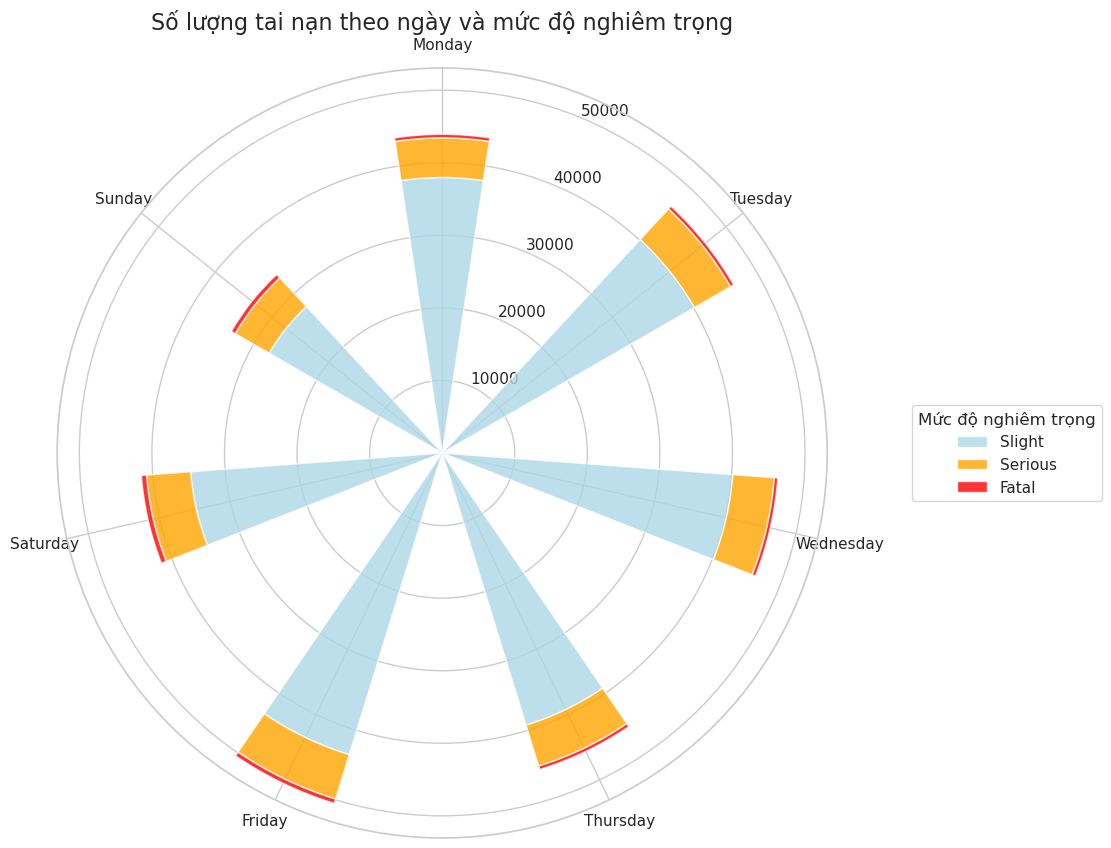

In [110]:
# Chuẩn bị dữ liệu: Nhóm tổng số tai nạn và mức độ nghiêm trọng theo ngày
severity_counts = df.groupby(['Day_of_Week', 'Accident_Severity']).size().reset_index(name='Count')
total_counts = df.groupby('Day_of_Week').size().reset_index(name='Total')

# Sắp xếp thứ tự ngày trong tuần
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
severity_counts['Day_of_Week'] = pd.Categorical(severity_counts['Day_of_Week'], categories=order, ordered=True)
total_counts['Day_of_Week'] = pd.Categorical(total_counts['Day_of_Week'], categories=order, ordered=True)

# Chuẩn bị dữ liệu
severity_bar_data = severity_counts.pivot(index='Day_of_Week', columns='Accident_Severity', values='Count').fillna(0)
severity_bar_data = severity_bar_data.reindex(order)

# Chuyển đổi sang dạng tỉ lệ phần trăm (tùy chọn)
severity_bar_data_percent = severity_bar_data.div(severity_bar_data.sum(axis=1), axis=0)

# Vẽ biểu đồ thanh vòng tròn với mức độ nghiêm trọng
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})

angles = [n / float(len(order)) * 2 * pi for n in range(len(order))]
width = 0.3

# Vẽ các mức độ nghiêm trọng thành các phần của thanh
bottom = np.zeros(len(order))  # Bắt đầu từ đáy (0)
for severity, color in zip(['Slight', 'Serious', 'Fatal'], ['lightblue', 'orange', 'red']):
    values = severity_bar_data[severity]
    ax.bar(
        angles, values, width=width, bottom=bottom, color=color, label=severity, alpha=0.8
    )
    bottom += values  # Cộng dồn chiều cao của phần trước

# Thêm nhãn trục
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels(order)

# Thêm chú thích
plt.legend(title='Mức độ nghiêm trọng', loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.title('Số lượng tai nạn theo ngày và mức độ nghiêm trọng', fontsize=16)
plt.show()


**Đây là biểu đồ thanh dọc theo vòng tròn, kết hợp số lượng tai nạn tổng cộng và phân bố mức độ nghiêm trọng cho từng ngày trong tuần**
- Trục vòng tròn:
  - Gồm 7 hướng tương ứng với các ngày trong tuần, từ Monday (Thứ Hai) đến Sunday (Chủ Nhật).
- Chiều dài thanh (từ tâm ra ngoài):
  - Thể hiện tổng số lượng tai nạn trong mỗi ngày.
  - Thanh dài hơn đồng nghĩa với số tai nạn nhiều hơn.
- Phân đoạn màu sắc trên thanh:
  - Mỗi thanh được chia thành 3 phần:
  - Màu xanh nhạt (Slight): Tai nạn nhẹ.
  - Màu cam (Serious): Tai nạn trung bình.
  - Màu đỏ (Fatal): Tai nạn nghiêm trọng.

**Lý do chọn biểu đồ**
- Dễ so sánh tổng số tai nạn giữa các ngày: Nhờ chiều dài của các thanh.
- Hiển thị chi tiết mức độ nghiêm trọng: Phần màu sắc chia nhỏ trên thanh giúp thấy rõ phân bố Slight, Serious, và Fatal.
- Trực quan hóa sáng tạo: Dạng vòng tròn hấp dẫn và dễ theo dõi tuần hoàn (thứ tự các ngày trong tuần).

**Lý do không chọn các biểu đồ khác**
- Vì các biểu đồ như cột, đường, hoặc tròn, ... không thể hiện tốt tính tuần hoàn và khó tích hợp cả tổng số tai nạn và mức độ nghiêm trọng trong cùng một biểu đồ. Hoặc nếu tích hợp được thì không mang tính sáng tạo, dễ bị nhàm chán

##### **Phân tích**

**Số lượng tai nạn tổng cộng**
  1. Ngày có số tai nạn nhiều nhất:
    - Friday (Thứ Sáu) có tổng số tai nạn cao nhất, thể hiện qua thanh dài nhất.
    - Saturday (Thứ Bảy) cũng có số tai nạn cao, nhưng thấp hơn một chút so với Friday.
  2. Ngày có số tai nạn ít nhất:
  - Monday (Thứ Hai) có thanh ngắn nhất, cho thấy số lượng tai nạn thấp nhất trong tuần.

**Mức độ nghiêm trọng**
  1. Tai nạn Slight (màu xanh nhạt):Chiếm tỷ lệ lớn nhất trong tổng số tai nạn ở tất cả các ngày.
    - Điều này cho thấy đa số các tai nạn giao thông trong tuần là nhẹ.
  2. Tai nạn Serious (màu cam):
    - Có mặt ở tất cả các ngày, nhưng chiếm tỷ lệ nhỏ hơn Slight.
    - Friday và Saturday có phần Serious tương đối lớn hơn so với các ngày khác, cho thấy nguy cơ tai nạn trung bình tăng cao vào cuối tuần.
  3. Tai nạn Fatal (màu đỏ):
    - Saturday và Friday có phần màu đỏ lớn hơn so với các ngày khác, cho thấy số tai nạn nghiêm trọng (Fatal) tập trung vào cuối tuần.
    - Các ngày giữa tuần (Tuesday, Wednesday) có ít tai nạn Fatal hơn hẳn.
    
**Nguyên nhân**
- Số lượng tai nạn, đặc biệt là tai nạn nghiêm trọng (Fatal), có xu hướng tăng vào cuối tuần (Friday, Saturday) có thể do mật độ giao thông cao hơn (hoạt động giải trí, du lịch) và các hành vi lái xe không an toàn như sử dụng rượu bia.
- Monday có số lượng tai nạn thấp nhất, phần Fatal gần như không tồn tại. Điều này có thể do lưu lượng giao thông đầu tuần ít hơn và hành vi lái xe cẩn thận hơn.

**Đề xuất**
1. Tăng cường giám sát giao thông vào cuối tuần:
  - Triển khai lực lượng kiểm tra nồng độ cồn và tốc độ vào Friday và Saturday, đặc biệt vào buổi tối hoặc đêm.
2. Tăng cường tuyên truyền an toàn giao thông:
  - Tập trung vào cuối tuần để nâng cao nhận thức, hạn chế lái xe khi sử dụng rượu bia.
3. Phân tích chi tiết hơn vào giờ cao điểm:
  - Tiếp tục kiểm tra thêm khung thời gian (sáng, chiều, tối) trong các ngày nguy cơ cao (Friday, Saturday) để xác định các khung giờ tai nạn nghiêm trọng xảy ra.

#### **3.2.3 Giờ nào trong ngày có số tai nạn giao thông cao nhất?**

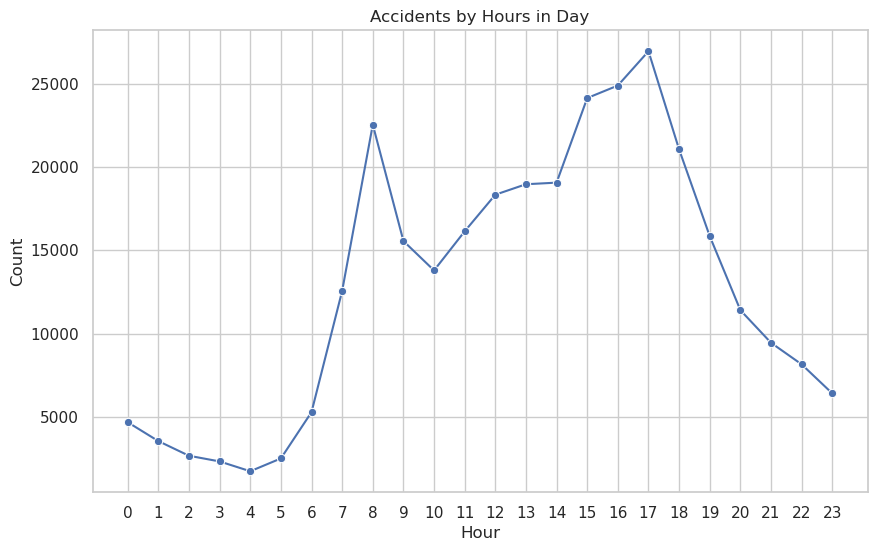

In [111]:
data = pd.read_csv('Road Accident Data.csv')
x = np.array(data['Time'].dropna().str.split(':', expand=True).astype(int))[:, 0]
x = np.unique(x, return_counts=True)
plt.figure(figsize=(10, 6))
sns.lineplot(x=x[0], y=x[1], marker='o')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.title('Accidents by Hours in Day')
plt.grid(True)

- Tai nạn thường xảy ra vào các thời gian cao điểm trong ngày như 8h sáng và 5h chiều, đây là những lúc có lượng xe trên đường khá lớn do mọi người sẽ bắt đầu đi làm/tan làm. Số lượng tai nạn sẽ thấp hơn vào buổi tối và trưa vì những lúc này lượng xe sẽ thấp hơn nhiều. Do vậy để giảm nguy cơ gặp tai nạn, không nên ra ngoài vào những giờ cao điểm trừ khi thực sự cần thiết.

#### **3.2.4 Phân tích mức độ nghiêm trọng của tai nạn và điều kiện thời tiết**

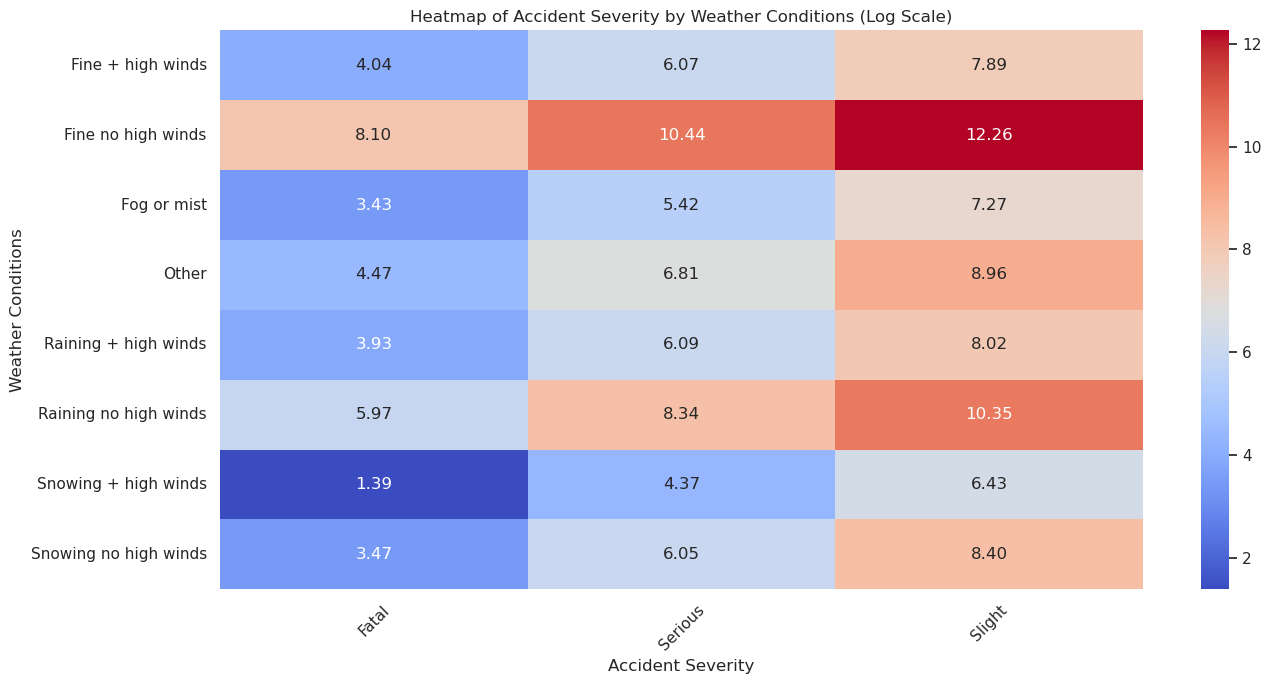

In [112]:
severity_weather = df[['Accident_Severity', 'Weather_Conditions']]

# Đếm số lượng tai nạn theo mức độ nghiêm trọng và điều kiện thời tiết
severity_weather_counts = severity_weather.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack().fillna(0)

# Áp dụng log scale lên dữ liệu
severity_weather_counts_log = np.log1p(severity_weather_counts)  # log1p(x) = log(1 + x)

# Vẽ heatmap với log scale
plt.figure(figsize=(14, 7))
sns.heatmap(severity_weather_counts_log, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Accident Severity by Weather Conditions (Log Scale)')
plt.xlabel('Accident Severity')
plt.ylabel('Weather Conditions')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

\**Việc sử dụng thang đo logarit giúp hiển thị rõ hơn sự khác biệt giữa các giá trị lớn và nhỏ.*

- Trời đẹp không có gió mạnh liên tục ghi nhận tỷ lệ tai nạn cao nhất trên mọi mức độ nghiêm trọng, có thể do lưu lượng giao thông lớn trong điều kiện thời tiết thuận lợi.

- Các điều kiện thời tiết khắc nghiệt như "Tuyết rơi + gió mạnh" thường có tỷ lệ tai nạn thấp hơn, có khả năng do người dân hạn chế di chuyển.

- Các điều kiện trung bình như "Mưa không có gió mạnh" vẫn đóng góp đáng kể vào tai nạn, đặc biệt ở mức "Nghiêm trọng" và "Nhẹ."

Như vậy ngoài việc cần cẩn trọng hơn khi thời tiết xấu, gây cản trở giao thông, người tham gia giao thông cũng không nên chủ quan khi thời tiết bình thường.

#### **3.2. 5 Tai nạn giao thông thay đổi theo ngày trong tháng với điều kiện ánh sáng khác nhau như thế nào?**

In [113]:
# lọc thời gian từ tháng 7 đến tháng hết 12
start_date = pd.Timestamp('2022-07-01')
end_date = pd.Timestamp('2022-12-31')
filtered_data = df[(df['Accident Date'] >= start_date) & (df['Accident Date'] <= end_date)]

# lọc điều kiện ánh sáng ngày và đêm
filtered_data['Light_Conditions'] = filtered_data['Light_Conditions'].apply(
    lambda x: 'Darkness' if 'Darkness' in x else 'Daylight'
)

/tmp/ipykernel_11957/1752743800.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Daylight

In [114]:
# lọc điều kiện ánh sáng là ban ngày
filtered_daylight = filtered_data[filtered_data['Light_Conditions'] == 'Daylight']

# góm nhóm dữ liệu theo ngyà và tính số lượng 
filtered_daily_accidents = filtered_daylight.groupby(filtered_daylight['Accident Date'].dt.date)['Accident_Index'].count().reset_index()
filtered_daily_accidents.columns = ['Date', 'Accident Count']

# Đặt ngày là index cho time series analysis
filtered_daily_accidents.set_index('Date', inplace=True)

# Seasonal decomposition to split data into trend, seasonality, and residuals
result = seasonal_decompose(filtered_daily_accidents['Accident Count'], model='additive', period=30)

# lấy các thành phần
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plotting tất cả thành phần
fig = go.Figure()

# Số lượng vụ tai nạn
fig.add_trace(go.Scatter(x=filtered_daily_accidents.index, y=filtered_daily_accidents['Accident Count'], 
                         mode='lines', name='Số lượng vụ tai nạn'))

# Trend
fig.add_trace(go.Scatter(x=trend.index, y=trend, mode='lines', name='Trend', line=dict(dash='dash',color='red')))

# Seasonality
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal, mode='lines', name='Seasonality', line=dict(dash='dot',color='black')))

# Residual
fig.add_trace(go.Scatter(x=residual.index, y=residual, mode='lines', name='Residua', line=dict(dash='dashdot',color='orange')))

# Update layout
fig.update_layout(title='Phân tích dữ liệu tai nạn từ tháng 7 đến tháng 12 với điều kiện ánh sáng ban ngày',
                  xaxis_title='Ngày',
                  yaxis_title='Số lượng',
                  xaxis=dict(tickformat='%d-%b-%y', showgrid=True),
                  yaxis=dict(showgrid=True, zeroline=False),
                  showlegend=True)

fig.show()

##### Darkness

In [115]:
# lọc điều kiện ánh sáng là ban đêm
filtered_daylight = filtered_data[filtered_data['Light_Conditions'] == 'Darkness']

# góm nhóm dữ liệu theo ngyà và tính số lượng 
filtered_daily_accidents = filtered_daylight.groupby(filtered_daylight['Accident Date'].dt.date)['Accident_Index'].count().reset_index()
filtered_daily_accidents.columns = ['Date', 'Accident Count']

# Đặt ngày là index cho time series analysis
filtered_daily_accidents.set_index('Date', inplace=True)

# Seasonal decomposition to split data into trend, seasonality, and residuals
result = seasonal_decompose(filtered_daily_accidents['Accident Count'], model='additive', period=30)

# lấy các thành phần
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plotting tất cả thành phần
fig = go.Figure()

# Số lượng vụ tai nạn
fig.add_trace(go.Scatter(x=filtered_daily_accidents.index, y=filtered_daily_accidents['Accident Count'], 
                         mode='lines', name='Số lượng vụ tai nạn'))

# Trend
fig.add_trace(go.Scatter(x=trend.index, y=trend, mode='lines', name='Trend', line=dict(dash='dash',color='red')))

# Seasonality
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal, mode='lines', name='Seasonality', line=dict(dash='dot',color='black')))

# Residual
fig.add_trace(go.Scatter(x=residual.index, y=residual, mode='lines', name='Residual', line=dict(dash='dashdot',color='orange')))

# Update layout
fig.update_layout(title='Phân tích dữ liệu tai nạn từ tháng 7 đến tháng 12 với điều kiện ánh sáng ban đêm',
                  xaxis_title='Ngày',
                  yaxis_title='Số lượng',
                  xaxis=dict(tickformat='%d-%b-%y', showgrid=True),
                  yaxis=dict(showgrid=True, zeroline=False),
                  showlegend=True)

fig.show()

**Phân tích sự thay đổi số lượng tại nạn giao thông theo ngày trong một tháng với điều kiện ánh sáng khác nhau**

##### Loại biểu đồ sử dụng:
- Biểu đồ phân tích thành phần (Decomposition Plot) này thể hiện:
  - Xu hướng (Trend): Xu hướng dài hạn của số tai nạn.
  - Mùa vụ (Seasonality): Tính chu kỳ lặp lại theo tháng.
  - Nhiễu (Residuals): Phần biến động không thể giải thích được bởi xu hướng và mùa vụ.
  - Lý do chọn biểu đồ này:
    - Giúp tách biệt rõ ràng các thành phần trong chuỗi thời gian: xu hướng, mùa vụ, và nhiễu.
    - Là công cụ đặc thù để phân tích dữ liệu chuỗi thời gian, cung cấp thông tin chi tiết mà biểu đồ đường hoặc cột không thể hiện được.

- Lý do không sử dụng các biểu đồ khác: 
    - Biểu đồ đường: Dễ bị rối nếu sử dụng hai đường riêng biệt cho điều kiện ánh sáng, không cho thấy rõ sự so sánh tỷ trọng giữa hai trạng thái.
    - Biểu đồ cột: Số lượng ngày trong 1 tháng khá lớn và xét với nhiều tháng khác nhau, khi dùng rất dễ bị rối và khó phân tích được xu hướng chung.
    - Biểu đồ tròn: Không phù hợp để phân tích dữ liệu chuỗi thời gian vì chỉ thể hiện tỷ lệ tại một thời điểm nhất định, không cho thấy sự thay đổi theo thời gian.
    - Biểu đồ hộp (Box Plot): Thích hợp để hiển thị phân phối dữ liệu và phát hiện các giá trị ngoại lệ, nhưng không thể hiện được xu hướng và mùa vụ trong chuỗi thời gian.

**Phân tích**
- Nhìn chung số lượng vụ tai nạn xảy ra ban ngày chiếm khá lớn hơn nhiều so với ban đêm, đặc biệt là vào các tháng 7 đến tháng 12.
- Phân tích biểu đồ ở điều kiện ánh sáng ban ngày( [daylight](#daylight) ) :
  - Xu hướng: 
    + Số lượng vụ tai nạn có xu hướng giảm dần trong gia đoạn này. Các ngày đầu tháng có xu hướng giảm nhẹ đến giữa tháng có gia tăng và giảm dần vào cuối tháng.
  - Tính mùa vụ:
    + Tính chu kì được thể hiện rất rỏ ràng , giảm vào ngày 1 đén ngày 5, sau đó tăng mạnh đến các ngày ở giữa tháng, giảm vào các ngày 20 và tăng nhanh đến khoảng ngày 25 và giảm dần về cuối tháng.
    + Nhiễu (Residual): Một số ngày có sự tăng, giảm vụ tay nạn cực lớn như 3, 7, 17, 19, 26. 
- Phân tích biểu đồ ở điều kiện ánh sáng ban đêm( [Darkness](#darkness) ) :
  - Xu hướng :
    + Ở giai đoạn tháng 7 đến tháng 10 số lượng vụ tai bạn có xu hướng tăng nhẹ ở những ngày đầu tháng và giảm nhẹ ở những ngày cuối tháng.
    + Ở giai đoạn tháng 11 với xu hướng tăng nhanh từ đầu tháng đến giữa tháng và giảm vào cuối tháng.
    + Đến tháng 12 số lượng vụ tai nạn có xu hướng giảm dần.
  - Tính mùa vụ :
    + Có tính chu kì rỏ rệt trong chuỗi dữ liệu, đặc biệt là ở giai đoạn tháng 7 đến tháng 10. Với sự giảm nhẹ ở một vài ngày đầu tháng và tăng dần vào những ngày 7, 8 sau đó giảm ở ngày 9 và 10.
    + Các ngày khác dến cuối tháng, số vụ tai nạn tăng giảm nhẹ, phản ánh tính lặp lại có chu kỳ nhưng với biên độ nhỏ.
  - Nhiễu (Residual):
    + Một số đỉnh cao rõ ràng vào đầu hoặc giữa tháng, cho thấy những ngày cụ thể trong tháng có số vụ tai nạn tăng đột biến.
- **Kết luận** : 
  - Điều kiện ánh sáng ban ngày (Daylight):
    + Số lượng vụ tai nạn có xu hướng giảm dần trong khoảng thời gian từ tháng 7 đến tháng 12.
    + Tính chu kỳ rõ rệt với các đỉnh cao vào giữa tháng (khoảng ngày 15-25), sau đó giảm dần vào cuối tháng.
    + Một số ngày trong tháng như ngày 3, 7, 17, 19, 26 có sự tăng/giảm đột biến về số vụ tai nạn, có thể liên quan đến các yếu tố không lặp lại như sự kiện hoặc thời tiết xấu.
  - Điều kiện ánh sáng ban đêm (Darkness):
    + Từ tháng 7 đến tháng 10: Số vụ tai nạn có xu hướng tăng nhẹ vào đầu tháng và giảm dần về cuối tháng.
    + Tháng 11: Số vụ tai nạn tăng mạnh từ đầu tháng đến giữa tháng, sau đó giảm dần vào cuối tháng.  
    + Tháng 12: Số vụ tai nạn giảm dần ổn định.
    + Tính chu kỳ:
      + Rõ ràng nhất vào giai đoạn tháng 7 đến tháng 10, với sự tăng vào các ngày 7-8 và giảm vào ngày 9-10.
      + Vào cuối tháng, biên độ dao động nhỏ nhưng vẫn phản ánh tính lặp lại có chu kỳ.
    + Một số đỉnh cao đột biến xảy ra vào đầu hoặc giữa tháng, có thể liên quan đến các yếu tố ngoại lệ.

- Đề xuất:
  - Đối với ánh sáng ban ngày (Daylight):
    + Tăng cường kiểm soát giao thông vào giữa tháng (đặc biệt là từ ngày 15-25), vì đây là giai đoạn có nguy cơ tai nạn cao.
    + Giám sát chặt chẽ vào các ngày đột biến như ngày 3, 7, 17, 19, 26 để tìm hiểu nguyên nhân, có thể liên quan đến các sự kiện hoặc điều kiện giao thông đặc biệt.
    + Tuyên truyền cho người tham gia giao thông về sự tăng cao của tai nạn vào giữa tháng để nâng cao ý thức cảnh giác.
  - Đối với ánh sáng ban đêm (Darkness):
    + Tăng cường giám sát vào đầu tháng và giữa tháng, đặc biệt là từ tháng 7 đến tháng 10, khi số vụ tai nạn có xu hướng tăng.
    + Tháng 11 cần chú ý đầu tháng và giữa tháng do sự gia tăng nhanh chóng trong các ngày này.
    + Theo dõi sát các giai đoạn tăng đột biến vào đầu tháng hoặc giữa tháng để tìm hiểu yếu tố dẫn đến nguy cơ cao (ví dụ: thời tiết, điều kiện đường sá, sự kiện ban đêm).

### **3.2.6 Loại đường nào xảy ra tai nạn nhiều nhất trong tháng và thay đổi như nào theo thời gian ?**

In [116]:

# 3. Thêm cột năm và tháng
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month

# 4. Tạo danh sách các năm có trong dữ liệu
years = df['Year'].unique()

# 5. Tạo dữ liệu tổng hợp theo năm và loại đường
grouped_data = df.groupby(['Year', 'Month', 'Road_Type']).size().reset_index(name='Number_of_Accidents')

# 6. Tạo danh sách các nút bấm dropdown
fig = go.Figure()

buttons = []
for year in years:
    yearly_data = pd.DataFrame()
    # Lọc dữ liệu cho từng năm
    yearly_data = grouped_data[grouped_data['Year'] == year]
    
    # Thêm đường cho từng loại đường trong năm hiện tại
    road_types = yearly_data['Road_Type'].unique()

    for road_type in road_types:
        road_data = yearly_data[yearly_data['Road_Type'] == road_type]
        fig.add_trace(go.Scatter(
            x=road_data['Month'],
            y=road_data['Number_of_Accidents'],
            mode='lines+markers',
            name=f'{road_type}({year})',
            visible=(year == 2021)  # Ban đầu ẩn tất cả các trace
        ))
    
    # Tạo nút dropdown để hiển thị dữ liệu của năm hiện tại
    button = dict(
        label=str(year),
        method="update",
        args=[
            {"visible": [i >= len(road_types) * (year - years.min()) and 
                         i < len(road_types) * (year - years.min() + 1) for i in range(len(fig.data))]},
            {"title": f"Phân tích số vụ tai nạn trên các loại đường di chuyển khác nhau qua từng năm"}
        ]
    )
    buttons.append(button)


# 7. Thêm menu dropdown
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            x=0.5,
            y=1.09,
            xanchor='left',
            yanchor='top'
        )
    ],
    title=f"Phân tích số vụ tai nạn trên các loại đường di chuyển khác nhau qua từng năm",
    xaxis_title='Tháng',
    yaxis_title='Số vụ tai nạn',
    xaxis=dict(
        tickmode='linear',
        tick0=1,  # Bắt đầu từ tháng 1
        dtick=1   # Mỗi tick tương ứng 1 tháng
    ),
    hovermode='x unified',
    width=1000,
    height=600

)

# 8. Hiển thị biểu đồ
fig.show()

In [117]:
print(df['Road_Type'].unique())

['One way street' 'Single carriageway' 'Dual carriageway' 'Roundabout'
 'Slip road']


**Phân tích sự thay đổi số lượng tại nạn giao thông theo từng tháng trong năm 2021 và 2022 đã xảy ra trên những loại đường khác nhau**

##### Loại biểu đồ sử dụng:
- Biểu đồ đường thể hiện:
  + Số lượng tai nạn trên mỗi loại đường khác nhau với mục đính phân tích thời gian (Time Series) từng tháng theo năm.
  + Dữ liệu được chia theo loại đường (Road_Type) và kết hợp việc chọn năm (Year), giúp so sánh từng loại đường trong cùng một biểu đồ.
  + Khi chọn 2 lần vào năm 2021 sẽ hiện dữ liệu của 2 năm 2021 và 2022 để dễ dàng so sánh 2 năm.
- Lý do không sử dụng các biểu đồ khác: 
  - Biểu đồ cột (Bar Chart): không phù hợp vì dữ liệu được phân tích theo thời gian và cần thể hiện xu hướng qua từng tháng.
  - Biểu đồ dạng stack (Stacked Chart):có thể sử dụng, nhưng sẽ khó đọc khi hiển thị nhiều năm và loại đường trên cùng một biểu đồ.
  - Không dùng butterfly chart: vì sẽ khó trực quan cho nhiều loại đường và trong mỗi tháng khác nhau.
**Phân tích**
  - Năm 2021:
    + Loại đường Single carriageway có số vụ xảy ra khá lớn vì : đường Single Carriageway là loại đường một chiều với lưu lượng phương tiện di chuyển lớn, thường phổ biến ở các vùng nông thôn hoặc khu vực kết nối thành phố. Vì không có phân cách giữa các làn đường ngược chiều, khả năng xảy ra va chạm trực diện tăng cao, đặc biệt vào giờ cao điểm hoặc khi vượt ẩu.
    +  Ngược lại Dual carriageway, Roundabout, Slip road, Single carriage way,  One way street lại ít hơn và ít dao động vì : tai nạn ít hơn do các tuyến đường này thường được thiết kế để cải thiện an toàn, với dải phân cách giữa các chiều hoặc các biện pháp kiểm soát giao thông tốt hơn (như biển báo, đèn tín hiệu).
    + Không có sự thay đổi quá lớn so với năm 2021 với giao động đáng kể ở loại đường Single carriageway:
      + Giảm ở giai đoạn tháng 1 đến 2: nhiều khu vực trên thế giới vẫn bị ảnh hưởng bởi các đợt bùng phát dịch COVID-19. Chính phủ và các cơ quan chức năng áp dụng các biện pháp giãn cách xã hội như hạn chế đi lại, phong tỏa cục bộ và làm việc tại nhà. Những biện pháp này làm giảm lưu lượng phương tiện tham gia giao thông, từ đó số vụ tai nạn giao thông cũng giảm đáng kể.
      + Tăng từ tháng 2 đến tháng 11: hết phong tỏa và các biện pháp giãn cách: Bắt đầu từ tháng 2, nhiều khu vực dần nới lỏng các biện pháp hạn chế, cho phép người dân trở lại làm việc, học tập và tham gia các hoạt động kinh tế xã hội. Điều này làm tăng lưu lượng phương tiện trên đường, kéo theo rủi ro tai nạn tăng lên.
      + Giảm sâu vào tháng 12: thường gắn liền với điều kiện thời tiết khắc nghiệt như mưa, tuyết và sương mù, khiến người dân hạn chế di chuyển hoặc sử dụng các tuyến đường khác an toàn hơn (ví dụ: đường cao tốc).
  - Năm 2022: 
    + Loại đường Single carriageway có số vụ vẫn xảy ra khá lớn và ngược lại Dual carriageway, Roundabout, Slip road, Single carriage way,  One way street xãy ra vẫn ít hơn giống như năm 2021.
    + Có sự giao động đáng kể ở loại đường Single carriageway: 
        + Tăng từ tháng 1 đến tháng 3: đầu năm thường gắn với các dịp lễ lớn như Tết (hoặc các kỳ nghỉ khác), dẫn đến lượng phương tiện gia tăng đột biến. Trong thời gian này, thời tiết xấu (như mưa, tuyết ở một số vùng) có thể góp phần làm tăng tai nạn.
        + Giảm nhẹ vào tháng 4: đây là thời điểm sau kỳ nghỉ lễ lớn, lưu lượng phương tiện giảm, cộng với thời tiết ổn định hơn, dẫn đến tai nạn giảm nhẹ.
        + Giai đoạn giảm từ tháng 6 đến tháng 8: thời điểm mùa hè, nhiều người chọn kỳ nghỉ và di chuyển đến các địa điểm du lịch. Tuy nhiên, các tuyến đường Single Carriageway có thể ít sử dụng hơn do người dân chuyển sang sử dụng các tuyến cao tốc (motorways hoặc dual carriageways).
        + Tăng từ tháng 9 đến tháng 11: đây là thời điểm giao mùa, lưu lượng giao thông có xu hướng tăng trở lại do mùa tựu trường, người dân quay trở lại làm việc sau kỳ nghỉ hè. Các điều kiện thời tiết giao mùa (như mưa, sương mù) làm giảm tầm nhìn và tăng nguy cơ tai nạn.
        + Giảm sâu vào tháng 12: thời điểm cuối năm, đặc biệt gần kỳ nghỉ lễ Giáng sinh, mọi người có xu hướng hạn chế di chuyển đường dài. Nhiều quốc gia cũng tăng cường các biện pháp an toàn giao thông vào cuối năm như kiểm soát tốc độ, kiểm tra nồng độ cồn, dẫn đến giảm số vụ tai nạn.
- **Kết luận** : 
  - So sánh trong hai năm: Mặc dù có sự tương đồng trong các xu hướng chung (tai nạn tăng vào các tháng đầu năm và giảm vào tháng 12), có sự khác biệt về sự dao động trong từng giai đoạn.
    + Năm 2021: Sự giảm đáng kể vào tháng 1-2 và tháng 12 có thể giải thích chủ yếu bởi ảnh hưởng của dịch COVID-19, trong khi năm 2022 không có tác động mạnh mẽ từ dịch bệnh. Tuy nhiên, các yếu tố như dịp lễ, điều kiện thời tiết, và sự trở lại của giao thông sau các kỳ nghỉ vẫn có ảnh hưởng rõ rệt đến số vụ tai nạn.
  - Những đặc điểm về tai nạn trên đường Single Carriageway:
    + Dù có sự giảm nhẹ vào một số tháng, đường Single Carriageway vẫn ghi nhận số vụ tai nạn cao do đặc điểm thiết kế và lưu lượng giao thông lớn. Điều này nhấn mạnh tầm quan trọng của việc cải thiện các biện pháp an toàn, đặc biệt là tại các khu vực có lưu lượng giao thông cao.
- **Đề xuất**:
  -  Cần tăng cường các biện pháp kiểm soát và cải thiện an toàn trên các tuyến đường Single Carriageway, đặc biệt là trong các tháng cao điểm và khi điều kiện thời tiết xấu.
  - Cải thiện cơ sở hạ tầng đường bộ: Đầu tư vào việc nâng cấp và cải tạo các tuyến đường Single Carriageway, đặc biệt là ở những khu vực có lưu lượng giao thông cao. Việc lắp đặt dải phân cách, các biển báo cảnh báo an toàn, và tăng cường chiếu sáng vào ban đêm sẽ giúp giảm thiểu nguy cơ tai nạn.
  - Thực hiện kiểm tra và bảo dưỡng định kỳ: Các cơ quan chức năng cần triển khai chương trình bảo trì định kỳ, đặc biệt là vào mùa mưa, tuyết, và các điều kiện thời tiết khắc nghiệt. Điều này giúp đảm bảo tình trạng mặt đường luôn ổn định và giảm thiểu nguy cơ tai nạn do điều kiện hạ tầng kém.
    